In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import powerlaw
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io as sio

from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark

from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

import os
from os.path import expanduser

In [3]:
# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': 7})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"

In [7]:
# paths
save_fig_path = '../figs/'

load_path =  '../paper_figures_data/fig1/'
abc_path = '../paper_figures_data/fig1/'

In [5]:
def sing_exp(x, a, t1):
    return a * np.exp(-x/t1) 

def sing_exp_oscil(x, a, t1, coef, phase):
    f = 2
    return a * (coef * np.exp(-x/t1)  + (1-coef) * np.sqrt(2)*np.sin(phase + 2* np.pi*0.001 * f * x))

def double_exp(x, a, b, t1, t2):
    return a * (1-b) * np.exp(-x/t1) + a * (b) * np.exp(-x/t2) 

def sing_exp_oscil_anal(x, a, t1, coef):
    f = 2
    return a * (coef * np.exp(-x/t1)  + (1-coef) *np.cos(2* np.pi*0.001 * f * x))


# fig 1, examples of AC bias

In [8]:
T = [1, 2, 4, 8]
binSize = 1

# single OU
ac_dur_singOU = np.load(load_path + 'ac_sing_diffDur_tau20_timeLag500.npy')
ac_examp_singOU =  ac_dur_singOU[0]
tau_dist_exp_singOU =  np.load(load_path + 'tau_expFit_sing_tau20_T1000_timeLag500.npy')

# single oscill
ac_dur_1oscil = np.load(load_path + 'ac_1oscil_diffDur_tau_60_f2_timeLag700.npy')
ac_examp_1oscil =  ac_dur_1oscil[0]
params_dist_exp_1oscil =  np.load(load_path + 'params_expFit_analyticalFit_1oscil_tau_60_f2_T1000_timeLag700.npy')
tau_1oscil = []
for i in range(len(params_dist_exp_1oscil)):
    tau_1oscil.append(params_dist_exp_1oscil[i][1])

# double OU with spikes
ac_dur_dbSpikes = np.load(load_path + '2_ac_dbSpikes_diffDur_tau_5_80_b1_a05_timeLag500.npy')
ac_examp_dbSpikes =  ac_dur_dbSpikes[0]
params_dist_exp_dpSpikes =  np.load(load_path + 'params_expFit_dbSpikes_tau_5_80_b1_a05_T1000_timeLag500_fitFromLag1.npy')
tau1_dpSpikes = []
tau2_dpSpikes = []
for i in range(len(params_dist_exp_dpSpikes)):
    tau1_dpSpikes.append(params_dist_exp_dpSpikes[i][2])
    tau2_dpSpikes.append(params_dist_exp_dpSpikes[i][3])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:225: RuntimeWarning: invalid value encountered in log10


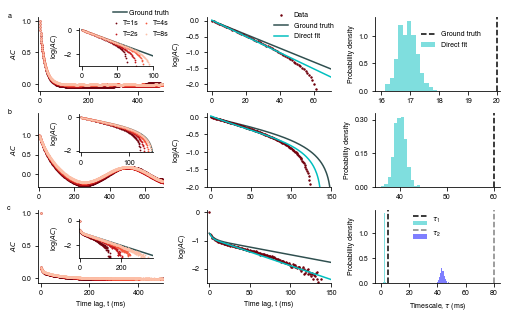

In [10]:
cm = 1/2.54  # centimeters in inches
fig = plt.figure(figsize=(21*cm, 12.4*cm))

# fig = plt.figure(figsize=(38,22))
fig.subplots_adjust(hspace=.9, wspace=1.1)


ft = 7
fleg = 7
fleg2 = 7

c4 = plt.cm.Reds(60)
c3 = plt.cm.Reds(140)
c2 = plt.cm.Reds(200)
c1 = plt.cm.Reds(250)
# c1 = 'brown'

# ctheor = 'DimGray'
# ctheor2 = 'darkgray'
ctheor = 'DarkSlateGray'
ctheor1 = 'k'
ctheor2 = 'gray'

cols = [c1, c2, c3, c4]

cExp = 'c'
cExp2 = 'b'
a = 0.5

timeLag_label = r'Time lag, t (ms)'
log_ac_label = r'log$(AC)$'
ac_label = r'$AC$'
data_label = r'Data'
density_label = r'Probability density'
exp_fit_label = r'Direct fit'

exp_fit_label_tau1 = r'$\tau_1$'
exp_fit_label_tau2 = r'$\tau_2$'
gt_label_tau1 = r'$\tau_1$'
gt_label_tau2 = r'$\tau_2$'
gt_label = r'Ground truth'
time_label = r'Timescale, $\tau$ (ms)'

x_text = -0.25
y_text = 1

slin = 1.2
slog = 0.6
sexamp = 2 
lw = 1.5

x = 6
y = 6

############### one timescale OU ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 0), colspan=2,rowspan=2)
ax.text(x_text,y_text,'a',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

maxTimeLag = 500
tau = 20
binLags = np.arange(0, maxTimeLag + binSize, binSize)

for i in range(4):
    ac = ac_dur_singOU[i]
    ac = ac/ac[0]
    plt.scatter(binLags,(ac),color = cols[i] ,label='T = ' + str(T[i]) + 's', s =slin)


plt.xlim([-5,500])
plt.yticks([0,0.5,1])
# plt.xlabel(timeLag_label)
plt.ylabel(ac_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

axins8 = inset_axes(ax, width="63%", height="58%", loc = 1 ,bbox_to_anchor=(0.0, 0.01, 0.95, 0.9),
                   bbox_transform=ax.transAxes)
ac = np.exp(-binLags/tau,)
axins8.plot(binLags[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)
for i in range(4):
    ac = ac_dur_singOU[i]
    ac = ac/ac[0]
    axins8.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cols[i] ,label='T=' + str(T[i])+ 's', s =slog, zorder=1)
    


axins8.set_xlim([-5,100])
axins8.set_ylim([-3,0.2])
# axins8.set_xlabel(timeLag_label)
axins8.set_ylabel(log_ac_label)
axins8.spines['right'].set_visible(False)
axins8.spines['top'].set_visible(False)
axins8.yaxis.set_ticks_position('left')
axins8.xaxis.set_ticks_position('bottom')  

# prepping legend
handles, labels = axins8.get_legend_handles_labels()
handles_top, labels_top = [handles[0]], [labels[0]]
leg1 = axins8.legend(handles_top, labels_top, frameon = False, fontsize = fleg2, loc = 'upper right',\
                handletextpad=0.3, bbox_to_anchor=(1.3, 1.63))

handles_bot, labels_bot = handles[1:], labels[1:]
leg2 = axins8.legend(handles_bot, labels_bot, ncol=2, frameon =False, loc = 'upper right', \
                     bbox_to_anchor=(1.3,1.36), columnspacing = 0.05, \
              handletextpad=0.01, fontsize = fleg2, markerscale=1)
axins8.add_artist(leg1)
#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 2), colspan=2,rowspan=2)
ac = ac_examp_singOU
ac = ac/ac[0]
ax.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cols[0] ,label=data_label , s =sexamp, zorder=1)

popt, pcov = curve_fit(sing_exp, binLags, ac, maxfev = 2000)
ax.plot(binLags, np.log10(sing_exp(binLags, *popt)), '-', color = cExp, linewidth = lw,\
         label=exp_fit_label % (popt[1]))

ac = np.exp(-binLags/tau)
ax.plot(binLags[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon = False, fontsize = fleg,loc = 'upper right',\
          bbox_to_anchor=(1.07,1.16))
# ax.set_xlabel(timeLag_label)
# bbox_to_anchor=(-0.03,-0.07)
ax.set_ylabel(log_ac_label)
ax.set_xlim([-3,70])
ax.set_ylim([-2.2,0.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (0, 4), colspan=2,rowspan=2)
plt.hist(tau_dist_exp_singOU, bins = np.arange(16,20,0.15), density = True, color = cExp,\
         label = exp_fit_label\
         , alpha = a)
plt.axvline(20, linestyle = '--', color = ctheor1, label = gt_label, linewidth = lw)

# plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(density_label)
# ax.set_xlim([15,21])
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend(frameon = False, fontsize = fleg, bbox_to_anchor=(0.32,0.9), loc = 'upper left')

############### oscill ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 0), colspan=2,rowspan=2)
ax.text(x_text,y_text,'b',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

tau = 60
maxTimeLag = 700
binLags = np.arange(0, maxTimeLag + binSize, binSize)

for i in range(4):
    ac = ac_dur_1oscil[i]
    ac = ac/ac[0]
    plt.scatter(binLags,(ac),color = cols[i] ,label='T = ' + str(T[i]) + 's', s =slin)


plt.xlim([-5,700])
plt.ylim([-0.32,1.55])
plt.yticks([0,0.5,1])
# plt.xlabel(timeLag_label)
plt.ylabel(ac_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

axins8 = inset_axes(ax, width="63%", height="58%", loc = 1 ,bbox_to_anchor=(0.0, 0.14, 0.95, 0.9),
                   bbox_transform=ax.transAxes)
# GT
f = 2*0.001
c = 0.8
ac = c *np.exp(-binLags/tau) + (1-c) * np.cos(2*np.pi*f*binLags)
axins8.plot(binLags[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)

for i in range(4):
    ac = ac_dur_1oscil[i]
    ac = ac/ac[0]
    axins8.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cols[i] ,label='T=' + str(T[i])+ 's', s =slog, zorder=1)
axins8.set_xlim([-5,150])
axins8.set_ylim([-2.1,0.2])
# axins8.set_xlabel(timeLag_label)
axins8.set_ylabel(log_ac_label)
axins8.spines['right'].set_visible(False)
axins8.spines['top'].set_visible(False)
axins8.yaxis.set_ticks_position('left')
axins8.xaxis.set_ticks_position('bottom') 


# axins8.set_xlabel(timeLag_label)
axins8.set_ylabel(log_ac_label)
axins8.spines['right'].set_visible(False)
axins8.spines['top'].set_visible(False)
axins8.yaxis.set_ticks_position('left')
axins8.xaxis.set_ticks_position('bottom')  

#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 2), colspan=2,rowspan=2)
ac = ac_examp_1oscil
ac = ac/ac[0]
ax.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cols[0] ,\
           label=data_label , s =sexamp, zorder=1)
popt, pcov = curve_fit(sing_exp_oscil, binLags, ac, maxfev = 2000)
ax.plot(binLags, np.log10(sing_exp_oscil(binLags, *popt)), '-', color = cExp, linewidth = lw, \
         label = exp_fit_label % (popt[1]))


f = 2*0.001
c = 0.8
ac = c *np.exp(-binLags/tau) + (1-c) * np.cos(2*np.pi*f*binLags)
ax.plot(binLags[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)

ax.set_ylabel(log_ac_label)
ax.set_xlim([-5,150])
ax.set_ylim([-2.,0.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (2, 4), colspan=2,rowspan=2)
plt.hist(tau_1oscil, bins = np.arange(36,45,0.7), density = True, color = cExp,\
         label = exp_fit_label, alpha = a)
plt.axvline(tau, linestyle = '--', color = ctheor1, label =gt_label, linewidth = lw)

# plt.xlabel(r'$\tau$ [ms]')
plt.ylabel(density_label)
# ax.set_xlim([16,20])
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


############### db spikes  ########################################################
#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 0), colspan=2,rowspan=2)
ax.text(x_text,y_text,'c',color='k',fontsize=ft,weight='bold', transform=ax.transAxes)

maxTimeLag = 500
binLags = np.arange(0, maxTimeLag + binSize, binSize)

for i in range(4):
    ac = ac_dur_dbSpikes[i]
    ac = ac/ac[0]
    plt.scatter(binLags,(ac),color = cols[i] ,label='T = ' + str(T[i]) + 's', s =slin)


plt.xlim([-10,500])
plt.yticks([0,0.5,1])
plt.xlabel(timeLag_label)
plt.ylabel(ac_label)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

axins8 = inset_axes(ax, width="63%", height="58%", loc = 1 ,bbox_to_anchor=(0.0, 0.014, 0.95, 0.9),
                   bbox_transform=ax.transAxes)
binLags_gt = binLags[:]
ac_gt = ((0.4) * np.exp(-binLags_gt/5) + (0.6) * np.exp(-binLags_gt/80))
ac = (ac_gt/ac_gt[1])*ac[1]
# ac = ac_gt * (0.25/1.25)
binLags_gt = binLags[0:]
axins8.plot(binLags_gt[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)

for i in range(4):
    ac = ac_dur_dbSpikes[i]
    ac = ac/ac[0]
    axins8.scatter(binLags[ac>0],np.log10(ac[ac>0]),color = cols[i] ,label='T=' + str(T[i])+ 's', s =slog, zorder=1)
axins8.set_xlim([-5,350])
axins8.set_ylim([-3.,0.1])
# axins8.set_xlabel(timeLag_label)
axins8.set_ylabel(log_ac_label)
axins8.spines['right'].set_visible(False)
axins8.spines['top'].set_visible(False)
axins8.yaxis.set_ticks_position('left')
axins8.xaxis.set_ticks_position('bottom')

#_______________________________________________________
ax = plt.subplot2grid((x,y), (4, 2), colspan=2,rowspan=2)
ac = ac_examp_dbSpikes
ac_data = ac/ac[0]
ax.scatter(binLags[ac_data>0],np.log10(ac_data[ac_data>0]),color = cols[0] ,\
           label=data_label , s =sexamp, zorder=1)
xdata = binLags[1:]
ydata = ac_data[1:]
popt, pcov = curve_fit(double_exp, xdata,ydata , maxfev = 2000)
timescales = popt[2:]
ax.plot(xdata, np.log10(double_exp(xdata, *popt)), '-', color = cExp, linewidth = lw, \
         label=exp_fit_label)

binLags_gt = binLags[:]
ac_gt = ((0.4) * np.exp(-binLags_gt/5) + (0.6) * np.exp(-binLags_gt/80))
ac = (ac_gt/ac_gt[1])*ac_data[1]
# ac = ac_gt * (0.25/1.25)
binLags_gt = binLags[0:]
ax.plot(binLags_gt[ac>0],np.log10(ac[ac>0]),color = ctheor ,label=gt_label, linewidth = lw, zorder=0)


ax.set_xlabel(timeLag_label)
ax.set_ylabel(log_ac_label)
ax.set_xlim([-3,150])
ax.set_ylim([-2.5,0.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#________________________________________________________
ax = plt.subplot2grid((x,y), (4, 4), colspan=2,rowspan=2)
plt.hist(tau1_dpSpikes, bins = np.arange(0,27,0.7), density = True, color = cExp, \
         label = exp_fit_label_tau1,\
         alpha = a)
plt.axvline(5,linestyle = '--', color = ctheor1, label =gt_label_tau1, linewidth = lw)

plt.hist(tau2_dpSpikes, bins = np.arange(30,60,0.7), density = True, color = cExp2,\
         label = exp_fit_label_tau2,\
         alpha = a)
plt.axvline(80, linestyle = '--', color = ctheor2, label = gt_label_tau2, linewidth = lw)

plt.xlabel(time_label)
plt.ylabel(density_label)
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

handles, labels = ax.get_legend_handles_labels()
handles_top, labels_top = [handles[2]], [labels[2]]

handles, labels = ax.get_legend_handles_labels()
handles_t1, labels_t1 = [handles[0],handles[2]], [labels[0],labels[2]]
leg1 = ax.legend(handles_t1, labels_t1,frameon = False, fontsize = fleg, bbox_to_anchor=(0.25,1.05), \
                 loc = 'upper left',labelspacing=-0.27)
for text in leg1.texts:
    text.set_visible(False)  # disable label
    
handles, labels = ax.get_legend_handles_labels()
handles_t1, labels_t1 = [handles[1],handles[3]], [labels[1],labels[3]]
leg2 = ax.legend(handles_t1, labels_t1,frameon = False, fontsize = fleg, bbox_to_anchor=(0.25,0.86), \
                 loc = 'upper left', labelspacing=-0.27)
for text in leg2.texts:
    text.set_visible(False)  # disable label

ax.add_artist(leg1)

plt.text(0.46,0.84,gt_label_tau1, transform=ax.transAxes, fontsize = fleg)
plt.text(0.46,0.64,gt_label_tau2, transform=ax.transAxes, fontsize = fleg)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.savefig(save_fig_path+'fig1.pdf',bbox_inches='tight')